In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

dataset = pd.read_csv("../data/logfile-v5.csv", delimiter=";")
dataset.head()

/tmp/ipykernel_669357/3584079888.py:8: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("../data/logfile-v5.csv", delimiter=";")


,time,datacenter_name,host_id,type,active,number_of_pes,available_pes,mips,available_mips,utilization_per_pe,ram,available_ram,bw,available_bw,power_model,vms
0,300.01,Datacenter_1,0,host,True,2,1,6000,2387.365877,"3000.0,0.0:3000.0,2387.3658765866667:",4000,17.0,1000,1000.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,0.0:2,433.04793488,..."
1,600.01,Datacenter_1,0,host,True,2,1,6000,2387.365877,"3000.0,0.0:3000.0,2387.3658765866667:",4000,17.0,1000,1000.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,0.0:2,433.04793488,..."
2,900.01,Datacenter_1,0,host,True,2,1,6000,2387.365877,"3000.0,0.0:3000.0,2387.3658765866667:",4000,17.0,1000,1000.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,0.0:2,433.04793488,..."
3,1200.01,Datacenter_1,0,host,True,2,1,6000,2387.365877,"3000.0,0.0:3000.0,2387.3658765866667:",4000,17.0,1000,1000.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,0.0:2,433.04793488,..."
4,1500.01,Datacenter_1,0,host,True,2,1,6000,2387.365877,"3000.0,0.0:3000.0,2387.3658765866667:",4000,17.0,1000,1000.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,0.0:2,433.04793488,..."


### Workload placement

#### Current workload placement

Host ID '0' at datacenter 'Datacenter_1' has 9 running workloads.
Host ID '1' at datacenter 'Datacenter_1' has 7 running workloads.
Host ID '2' at datacenter 'Datacenter_1' has 8 running workloads.
Host ID '3' at datacenter 'Datacenter_1' has 8 running workloads.
Host ID '4' at datacenter 'Datacenter_1' has 9 running workloads.
Host ID '5' at datacenter 'Datacenter_1' has 8 running workloads.
Host ID '6' at datacenter 'Datacenter_1' has 8 running workloads.
Host ID '7' at datacenter 'Datacenter_1' has 8 running workloads.
Host ID '8' at datacenter 'Datacenter_1' has 8 running workloads.
Host ID '9' at datacenter 'Datacenter_1' has 7 running workloads.
Host ID '10' at datacenter 'Datacenter_1' has 8 running workloads.
Host ID '11' at datacenter 'Datacenter_1' has 7 running workloads.
Host ID '12' at datacenter 'Datacenter_1' has 8 running workloads.
Host ID '13' at datacenter 'Datacenter_1' has 7 running workloads.
Host ID '14' at datacenter 'Datacenter_1' has 6 running workloads.
Host 

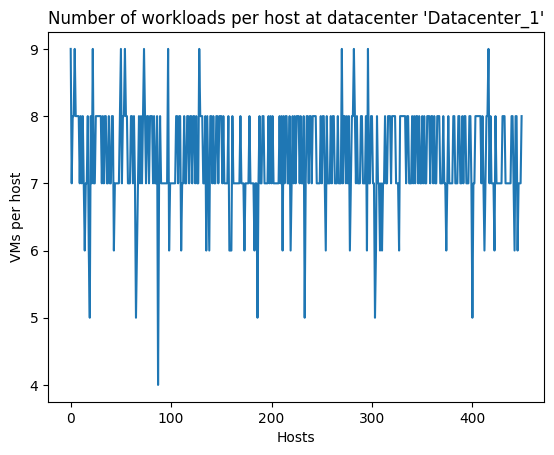

Host ID '450' at datacenter 'Datacenter_2' has 8 running workloads.
Host ID '451' at datacenter 'Datacenter_2' has 7 running workloads.
Host ID '452' at datacenter 'Datacenter_2' has 7 running workloads.
Host ID '453' at datacenter 'Datacenter_2' has 8 running workloads.
Host ID '454' at datacenter 'Datacenter_2' has 7 running workloads.
Host ID '455' at datacenter 'Datacenter_2' has 8 running workloads.
Host ID '456' at datacenter 'Datacenter_2' has 7 running workloads.
Host ID '457' at datacenter 'Datacenter_2' has 8 running workloads.
Host ID '458' at datacenter 'Datacenter_2' has 8 running workloads.
Host ID '459' at datacenter 'Datacenter_2' has 8 running workloads.
Host ID '460' at datacenter 'Datacenter_2' has 8 running workloads.
Host ID '461' at datacenter 'Datacenter_2' has 7 running workloads.
Host ID '462' at datacenter 'Datacenter_2' has 8 running workloads.
Host ID '463' at datacenter 'Datacenter_2' has 7 running workloads.
Host ID '464' at datacenter 'Datacenter_2' has 8

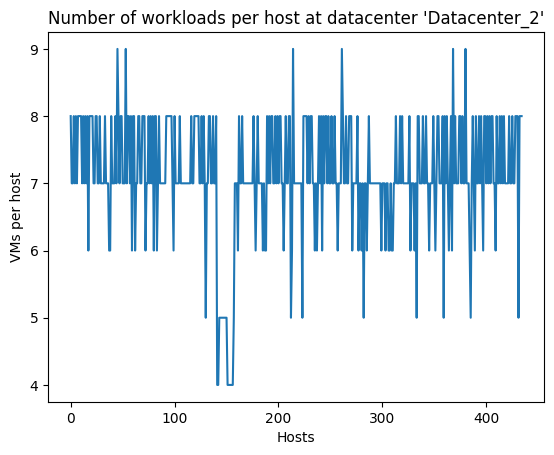

Host ID '885' at datacenter 'Datacenter_3' has 7 running workloads.
Host ID '886' at datacenter 'Datacenter_3' has 7 running workloads.
Host ID '887' at datacenter 'Datacenter_3' has 7 running workloads.
Host ID '888' at datacenter 'Datacenter_3' has 7 running workloads.
Host ID '889' at datacenter 'Datacenter_3' has 7 running workloads.
Host ID '890' at datacenter 'Datacenter_3' has 8 running workloads.
Host ID '891' at datacenter 'Datacenter_3' has 8 running workloads.
Host ID '892' at datacenter 'Datacenter_3' has 8 running workloads.
Host ID '893' at datacenter 'Datacenter_3' has 8 running workloads.
Host ID '894' at datacenter 'Datacenter_3' has 7 running workloads.
Host ID '895' at datacenter 'Datacenter_3' has 8 running workloads.
Host ID '896' at datacenter 'Datacenter_3' has 8 running workloads.
Host ID '897' at datacenter 'Datacenter_3' has 7 running workloads.
Host ID '898' at datacenter 'Datacenter_3' has 7 running workloads.
Host ID '899' at datacenter 'Datacenter_3' has 8

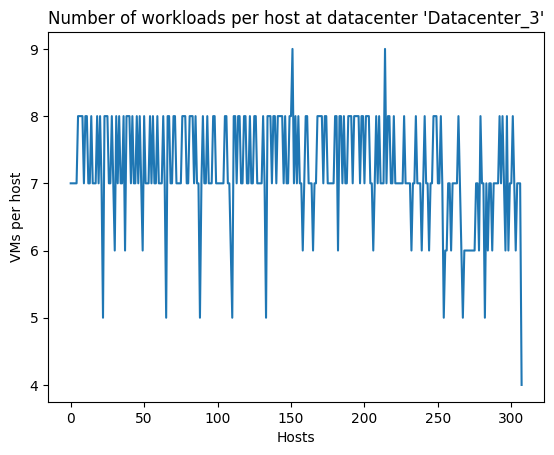

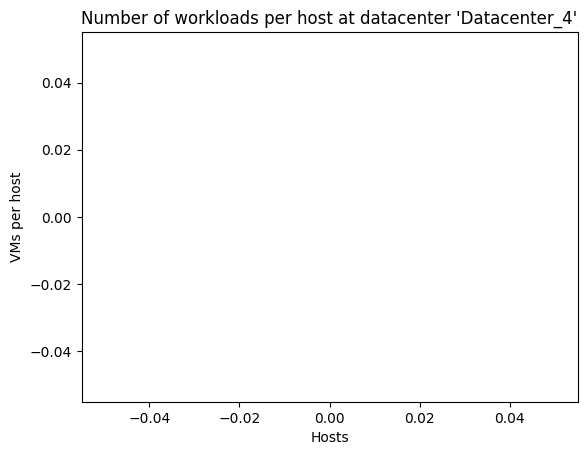

3315.0 Workloads at datacenter 'Datacenter_1'.
3096.0 Workloads at datacenter 'Datacenter_2'.
2223.0 Workloads at datacenter 'Datacenter_3'.
0.0 Workloads at datacenter 'Datacenter_4'.
The cloud provider has 8634.0 workloads running.


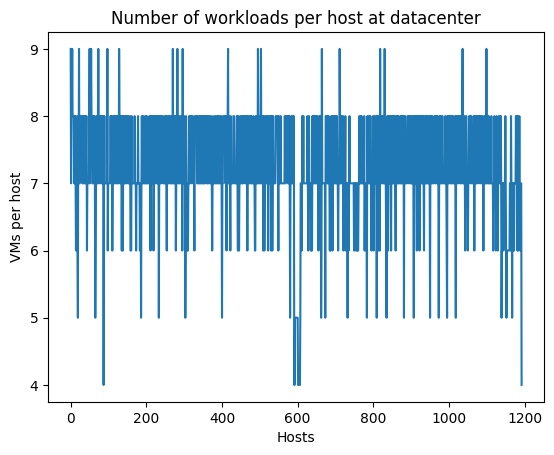

There are 502 powered down hosts.


In [2]:
labels = np.unique(dataset['datacenter_name'])
workload_per_datacenter = np.array([])
workload_per_host = np.array([])
num_powered_down_hosts = 0
for i in range(len(labels)):
    workload_per_datacenter_per_host = np.array([])
    
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        if sample['active'] == False:
            num_powered_down_hosts += 1
        if pd.notna(sample['vms']):
            workloads = len(sample['vms'].split(":"))-1
            print(f"Host ID '{sample['host_id']}' at datacenter '{sample['datacenter_name']}' has {workloads} running workloads.")
            workload_per_host = np.append(workload_per_host, len(sample['vms'].split(":"))-1)
            workload_per_datacenter_per_host = np.append(workload_per_datacenter_per_host, len(sample['vms'].split(":"))-1)
    workload_per_datacenter = np.append(workload_per_datacenter, sum(workload_per_datacenter_per_host))
    
    plt.plot(np.arange(len(workload_per_datacenter_per_host)), workload_per_datacenter_per_host, label="Workloads per host")
    plt.xlabel("Hosts")
    plt.ylabel("VMs per host")
    plt.title(f"Number of workloads per host at datacenter '{labels[i]}'")
    #plt.legend()
    plt.show()

for i in range(len(labels)):
    print(f"{workload_per_datacenter[i]} Workloads at datacenter '{labels[i]}'.")
print(f"The cloud provider has {sum(workload_per_datacenter)} workloads running.")

plt.plot(np.arange(len(workload_per_host)), workload_per_host, label="Workloads per host")
plt.xlabel("Hosts")
plt.ylabel("VMs per host")
plt.title(f"Number of workloads per host at datacenter")
#plt.legend()
plt.show()

print(f"There are {num_powered_down_hosts} powered down hosts.")

#### Simple resource aware workload placement

In [3]:

vms = []
hosts = []
for index, sample in dataset[dataset['time'] == 300.01].iterrows():
    hosts.append({
        "id": index,
        "datacenter": sample['datacenter_name'],
        "active": sample['active'],
        "power_model": sample['power_model'].split(","),
        "pes": int(sample['number_of_pes']),
        "mips": float(sample['mips']),
        "used_mips": (float(sample['mips']) - float(sample['available_mips'])),
        "ram": float(sample['ram']),
        "used_ram": (float(sample['ram']) - float(sample['available_ram'])),
        "bw": float(sample['bw']),
        "used_bw": (float(sample['bw']) - float(sample['available_bw'])),
    })
    if pd.notna(sample['vms']):
        for index, vm in enumerate(sample['vms'].split(":")):
            vm_allocated_resources = vm.split(",")
            if len(vm_allocated_resources) != 4:
                continue
            vms.append({
                "id": index,
                "pes": int(vm_allocated_resources[0]),
                "mips": float(vm_allocated_resources[1]),
                "ram": float(vm_allocated_resources[2]),
                "bw": float(vm_allocated_resources[3])
            })

vms_copy = vms.copy()
new_workloads_placement = []
for index_host, host in enumerate(hosts):
    used_mips = 0
    used_ram = 0
    used_bw = 0
    workloads_per_host = []
    
    for index_vm, vm in enumerate(vms_copy):
        if ((vm['mips'] + used_mips) <= host['mips']) and ((vm['ram'] + used_ram) <= host['ram']) and ((vm['bw'] + used_bw) <= host['bw']):
            used_mips += vm['mips']
            used_ram += vm['ram']
            used_bw += vm['bw']
            workloads_per_host.append(vm)
    
    new_workloads_placement.append(workloads_per_host)
    for index_vm, vm in enumerate(workloads_per_host):
        run = True
        index = 0
        while run:
            if vm['id'] == vms_copy[index]['id']:
                del vms_copy[index]
                run = False
            index += 1

Host ID '0' has 9 workloads running, utilizing (3612.6341234133333/6000.0) MIPS, (3983.0/4000.0) RAM, and (0.0/1000.0) Bandwidth,
 as supposed to (3612.6341234133333/6000.0) MIPS, (3983.0/4000.0) RAM, and (0.0/1000.0) Bandwidth, 
consuming 0.14712634123413335 Kilo Joules (kJ) per hour,
 with the previous workload placement consuming 0.14712634123413335 Kilo Joules (kJ) per hour.

Host ID '1' has 7 workloads running, utilizing (2723.130257173333/6000.0) MIPS, (3944.0/4000.0) RAM, and (0.0/1000.0) Bandwidth,
 as supposed to (2723.130257173333/6000.0) MIPS, (3944.0/4000.0) RAM, and (0.0/1000.0) Bandwidth, 
consuming 0.13423130257173332 Kilo Joules (kJ) per hour,
 with the previous workload placement consuming 0.13423130257173332 Kilo Joules (kJ) per hour.

Host ID '2' has 8 workloads running, utilizing (2879.18356704/6000.0) MIPS, (3921.0/4000.0) RAM, and (0.0/1000.0) Bandwidth,
 as supposed to (2879.18356704/6000.0) MIPS, (3921.0/4000.0) RAM, and (0.0/1000.0) Bandwidth, 
consuming 0.1357

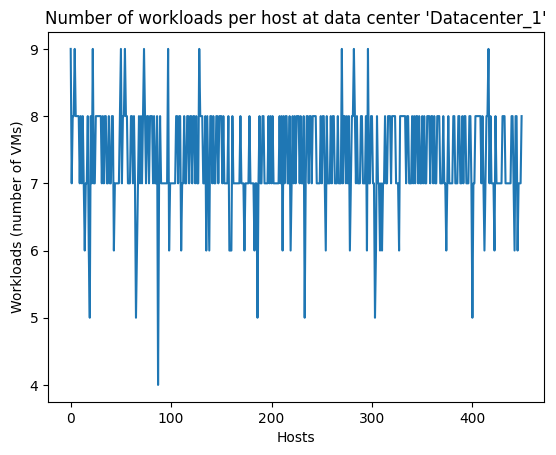

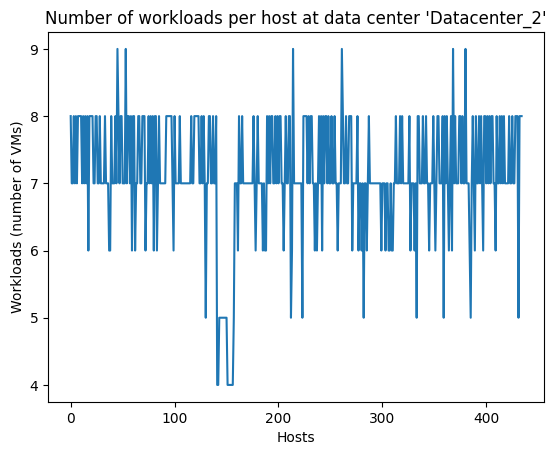

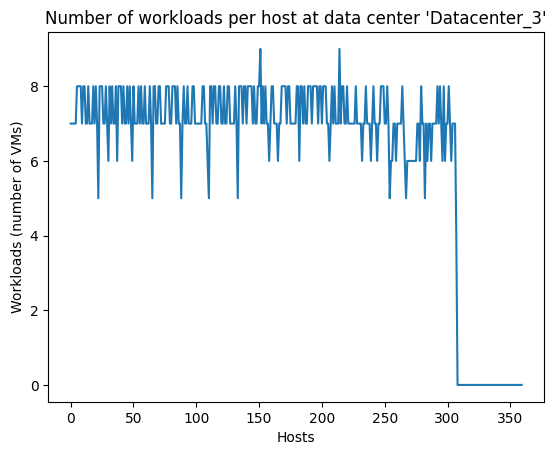

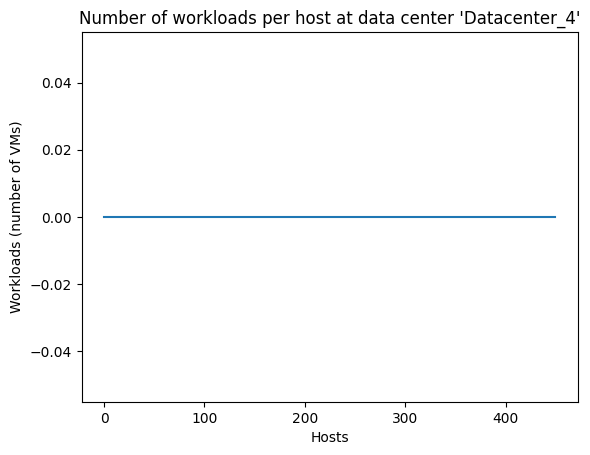

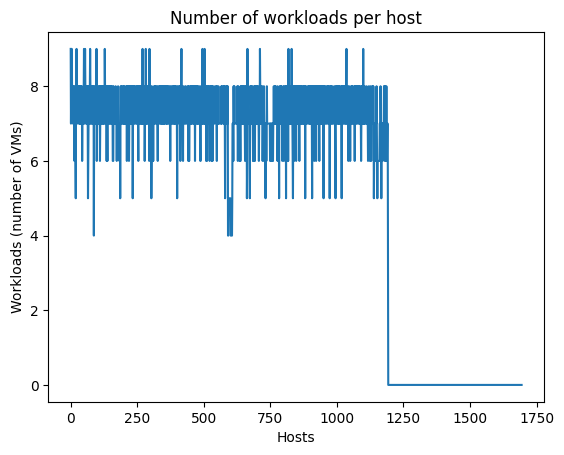

In [4]:
# Calculating the resource utilzation and the energy consumption.
new_power_per_host = np.array([])
current_power_per_host = np.array([])
new_workloads_placement_per_datacenter_per_host = {}

new_workloads_placement_per_host = np.array([])
for index_host, host in enumerate(new_workloads_placement):
    used_mips = 0
    used_ram = 0
    used_bw = 0
    vms = len(host)
    
    new_workloads_placement_per_host = np.append(new_workloads_placement_per_host, vms)
    # print(new_workloads_placement_per_datacenter_per_host.keys() in )
    # print(hosts[index_host]['datacenter'])
    # print(new_workloads_placement_per_datacenter_per_host['sd'])
    # print(new_workloads_placement_per_datacenter_per_host[hosts[index_host]['datacenter']])
    if hosts[index_host]['datacenter'] not in new_workloads_placement_per_datacenter_per_host.keys():
        # print(new_workloads_placement_per_datacenter_per_host[hosts[index_host]['datacenter']])
        new_workloads_placement_per_datacenter_per_host[hosts[index_host]['datacenter']] = np.array([])
    new_workloads_placement_per_datacenter_per_host[hosts[index_host]['datacenter']] = np.append(new_workloads_placement_per_datacenter_per_host[hosts[index_host]['datacenter']], vms)
    
    new_host_power = 0
    current_host_power = 0
    for index_vm, vm in enumerate(host):
        used_mips += vm['mips']
        used_ram += vm['ram']
        used_bw += vm['bw']
            
    # Getting the power consumption and resource utilization of the new workload placement
    if (used_mips == 0) and (used_ram == 0) and (used_bw == 0):
        pass
    else:
        utilization = used_mips/hosts[index_host]['mips']
        if utilization % 0.1 == 0:
            new_host_power += utilization * 10
        else:
            utilization_floor = int(math.floor(utilization * 10))
            utilization_ceil = int(math.ceil(utilization * 10))
            power_floor = float(hosts[index_host]['power_model'][utilization_floor])
            power_ceil = float(hosts[index_host]['power_model'][utilization_ceil])
            
            diff = (power_ceil - power_floor) / 10
            new_host_power = power_floor + diff * (utilization - utilization_floor / 10) * 100
            new_power_per_host = np.append(new_power_per_host, new_host_power)
    
    # Getting the power consumption and resource utilization of the current workload placement
    if hosts[index_host]['active'] == False:
        pass
    else:
        utilization = hosts[index_host]['used_mips']/hosts[index_host]['mips']
        if utilization % 0.1 == 0:
            current_host_power = utilization * 10
        
        utilization_floor = int(math.floor(utilization * 10))
        utilization_ceil = int(math.ceil(utilization * 10))
        power_floor = float(hosts[index_host]['power_model'][utilization_floor])
        power_ceil = float(hosts[index_host]['power_model'][utilization_ceil])
        
        diff = (power_ceil - power_floor) / 10
        current_host_power = power_floor + diff * (utilization - utilization_floor / 10) * 100
        current_power_per_host = np.append(current_power_per_host, current_host_power)
    
    print(f"Host ID '{index_host}' has {vms} workloads running, utilizing ({used_mips}/{hosts[index_host]['mips']}) MIPS, ({used_ram}/{hosts[index_host]['ram']}) RAM, and ({used_bw}/{hosts[index_host]['bw']}) Bandwidth,\n as supposed to ({hosts[index_host]['used_mips']}/{hosts[index_host]['mips']}) MIPS, ({hosts[index_host]['used_ram']}/{hosts[index_host]['ram']}) RAM, and ({hosts[index_host]['used_bw']}/{hosts[index_host]['bw']}) Bandwidth, \nconsuming {(new_host_power * 1)/1000} Kilo Joules (kJ) per hour,\n with the previous workload placement consuming {(current_host_power * 1)/1000} Kilo Joules (kJ) per hour.\n")
print(f"Cloud provider's power consumption would then be with the new placements be {(sum(new_power_per_host) * 1)/1000} Kilo Joules per hour,\n as supposed to the previous workload placements consuming {(sum(current_power_per_host) * 1)/1000} Kilo Joules per hour.")


for key in new_workloads_placement_per_datacenter_per_host.keys():
    print()
    plt.plot(np.arange(len(new_workloads_placement_per_datacenter_per_host[key])), new_workloads_placement_per_datacenter_per_host[key], label="Workloads per host")
    plt.xlabel("Hosts")
    plt.ylabel("Workloads (number of VMs)")
    plt.title(f"Number of workloads per host at data center '{key}'")
    #plt.legend()
    plt.show()

plt.plot(np.arange(len(new_workloads_placement_per_host)), new_workloads_placement_per_host, label="Workloads per host")
plt.xlabel("Hosts")
plt.ylabel("Workloads (number of VMs)")
plt.title("Number of workloads per host")
#plt.legend()
plt.show()

#### Optimal resource aware workload placement 

In [5]:
# import itertools
# def test_1(host, vms, num):
#     results = []
#     # combinations = itertools.permutations(vms, num)
#     for combo in itertools.permutations(vms, num):
#         print("1", end="")
#         vms_utilization = {
#             "mips": 0,
#             "ram": 0,
#             "bw": 0,
#             "vms": []
#         }
#         for vm in combo:
#             vms_utilization['mips'] += vm['mips']
#             vms_utilization['ram'] += vm['ram']
#             vms_utilization['bw'] += vm['bw']
#             vms_utilization['vms'].append(vm)
#         results.append(vms_utilization)
#     return results

# tmp_vms = vms.copy()
# new_workload_list = []
# for host in hosts:
#     print("------- Host -------")
#     run = True
#     index = 1
#     prev_results = []
#     results = []
#     while run:
#         print("------- run -------")
#         num_under = 0
#         num_over = 0 
#         results = test_1(host, tmp_vms, index)
        
#         for result in results:
#             mips_utilization = (result['mips']/host['mips'])*100
#             ram_utilization = (result['ram']/host['ram'])*100
#             bw_utilization = (result['bw']/host['bw'])*100
            
#             if run == True and ((mips_utilization > 80 and mips_utilization < 90) and (ram_utilization > 80 and ram_utilization < 90) and (bw_utilization > 80 and bw_utilization < 90)): # optimal utilization (avoiding under and over utilization)
#                 print("------- optimal -------")
#                 new_workload_list.append(results['vms'])
#                 run = False
#             elif run == True and (mips_utilization < 80 and ram_utilization < 80 and bw_utilization < 80): # underutilized
#                 num_under += 1
#             elif run == True and (mips_utilization > 90 and ram_utilization > 90 and bw_utilization > 90): # overutilized
#                 num_over += 1
#         print("------- run 2 -------")
#         if run == True and num_under > num_over:
#             print("------- under -------")
#             index += 1
#             prev_results = results
#         elif run == True and num_over > num_under:
#             # picking the best out the previous results
#             print("------- over -------")
#             best = {}
#             utilization = {
#                 "mips": 0,
#                 "ram": 0,
#                 "bw": 0
#             }
#             for result in prev_results: # Could improve 
#                 mips_utilization = (result['mips']/host['mips'])*100
#                 ram_utilization = (result['ram']/host['ram'])*100
#                 bw_utilization = (result['bw']/host['bw'])*100
                
#                 if mips_utilization > utilization['mips'] and ram_utilization > utilization['ram'] and bw_utilization > utilization['bw']:
#                     best = result
#                     utilization['mips'] = mips_utilization
#                     utilization['ram'] = ram_utilization
#                     utilization['bw'] = bw_utilization
            
#             new_workload_list.append(best)
#             run = False
            
#     for vm in new_workload_list[-1]['vms']:
#         del tmp_vms[vm['id']]

In [6]:
# for index, host in enumerate(new_workload_list):
#     print(f"Host '{index}' has {len(host['vms'])} workloads")

### Re-organization of workload placement

Rebalancing over utilized and under utilized physical host with the goal if better utilizing hosts.

In [52]:
labels = np.unique(dataset['datacenter_name'])
vms_reorganized = []
hosts_reorganized = []

vms_to_reallocate = np.array([])
num_powered_down_hosts_before = 0
over_utilized_hosts_before = 0
under_utilized_hosts_before = 0
optimal_hosts_before = 0

def find_vm_index(vms_temp, vm_id):
    index_of_vm = -1
    for index, vm_temp in enumerate(vms_temp):
        if vm_temp['id'] == vm_id:
            index_of_vm = index
    return index_of_vm

def find_vm_combo(mips, ram, bw, vms):
    optimal_vm_combination = {
        "vms": [],
        "unused_vms": [],
        "mips": 0,
        "ram": 0,
        "bw": 0,
        "points": 0
    }
    for vms_num in range(len(vms)):
        for combo in combinations(vms, vms_num):
            if optimal_vm_combination['vms'] == []:
                for vm in combo:
                    optimal_vm_combination['vms'].append(vm)
                    optimal_vm_combination['mips'] += vm['mips']
                    optimal_vm_combination['ram'] += vm['ram']
                    optimal_vm_combination['bw'] += vm['bw']
                optimal_vm_combination['points'] = ((optimal_vm_combination['mips'] / mips)*10) + ((optimal_vm_combination['ram'] / ram)*10) + ((optimal_vm_combination['bw'] / bw)*10)
            else:
                temp_optimal_vm_combination = {
                    "vms": [],
                    "unused_vms": [],
                    "mips": 0,
                    "ram": 0,
                    "bw": 0,
                    "points": 0
                }
                for vm in combo:
                    temp_optimal_vm_combination['vms'].append(vm)
                    temp_optimal_vm_combination['mips'] += vm['mips']
                    temp_optimal_vm_combination['ram'] += vm['ram']
                    temp_optimal_vm_combination['bw'] += vm['bw']
                temp_optimal_vm_combination['points'] = ((temp_optimal_vm_combination['mips'] / mips)*10) + ((temp_optimal_vm_combination['ram'] / ram)*10) + ((temp_optimal_vm_combination['bw'] / bw)*10)
                    
                if temp_optimal_vm_combination['points'] > optimal_vm_combination['points'] and ((temp_optimal_vm_combination['mips'] / mips) <= 0.9 and (temp_optimal_vm_combination['ram'] / ram) <= 0.9 and (temp_optimal_vm_combination['bw'] / bw) <= 0.9):
                    optimal_vm_combination = temp_optimal_vm_combination
    
    for vm in vms:
        found = False
        for vm_used in optimal_vm_combination['vms']:
            if vm_used['id'] == vm['id']:
                found = True
        
        if found == False:
            optimal_vm_combination['unused_vms'].append(vm)
    
    return optimal_vm_combination

for i in range(len(labels)):
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        vms_temp = []
        if pd.notna(sample['vms']):
            for index_vm, vm in enumerate(sample['vms'].split(":")):
                    if vm != "":
                        vm_allocated_resources = vm.split(",")
                        vms_temp.append({
                            "id": index_vm,
                            "pes": int(vm_allocated_resources[0]),
                            "mips": float(vm_allocated_resources[1]),
                            "ram": float(vm_allocated_resources[2]),
                            "bw": float(vm_allocated_resources[3])
                        })
        
        # check if host is over utilized
        mips_utilization = (sample['mips'] - sample['available_mips']) / sample['mips']
        ram_utilization = (sample['ram'] - sample['available_ram']) / sample['ram']
        bw_utilization = (sample['bw'] - sample['available_bw']) / sample['bw']
        
        if (mips_utilization >= 0.8 and mips_utilization <= 0.9) and (ram_utilization >= 0.8 and ram_utilization <= 0.9) and (bw_utilization >= 0.8 and bw_utilization <= 0.9):
            optimal_hosts_before += 1
        elif mips_utilization > 0.9 or ram_utilization > 0.9 or bw_utilization > 0.9:
            over_utilized_hosts_before += 1
            if pd.notna(sample['vms']):
                #workloads = len(sample['vms'].split(":"))-1
                
                # temp_available_mips = sample['available_mips']
                # temp_available_ram = sample['available_ram']
                # temp_available_bw = sample['available_bw']
        
                # print("------------")
                # print((sample['mips'] - sample['available_mips']) / sample['mips'])
                # print((sample['ram'] - sample['available_ram']) / sample['ram'])
                # print((sample['bw'] - sample['available_bw']) / sample['bw'])
                # print("---")
                vm_combo = find_vm_combo(sample['mips'], sample['ram'], sample['bw'], vms_temp.copy())
                # print(vm_combo['vms'])
                # print(vm_combo['unused_vms'])
                # print(vm_combo['mips'] / sample['mips'])
                # print(vm_combo['ram'] / sample['ram'])
                # print(vm_combo['bw'] / sample['bw'])
                # print(vm_combo['points'])
                # print((vm_combo['mips'] + vm_combo['unused_vms'][0]['mips']) / sample['mips'])
                # print((vm_combo['ram'] + vm_combo['unused_vms'][0]['ram'])/ sample['ram'])
                # print((vm_combo['bw'] + vm_combo['unused_vms'][0]['bw']) / sample['bw'])
                
                vms_temp = vm_combo['vms']
                for vm in vm_combo['unused_vms']:
                    vms_to_reallocate = np.append(vms_to_reallocate, vm)
                
                sample['available_mips'] = sample['mips'] - vm_combo['mips']
                sample['available_ram'] = sample['ram'] - vm_combo['ram']
                sample['available_bw'] = sample['bw'] - vm_combo['bw']
                
                # non_optimal_vms = []
                # for index_vm, vm in enumerate(sample['vms'].split(":")): # pes, mips, ram, bw
                #     if vm != "":
                #         vm_allocated_resources = vm.split(",")
                #         mips_utilization = ((sample['mips'] - sample['available_mips']) - float(vm_allocated_resources[1])) / sample['mips']
                #         ram_utilization = ((sample['ram'] - sample['available_ram']) - float(vm_allocated_resources[2])) / sample['ram']
                #         bw_utilization = ((sample['bw'] - sample['available_bw']) - float(vm_allocated_resources[3])) / sample['bw']
                        
                #         mips_optimal = (mips_utilization >= 0.8 and mips_utilization <= 0.9) 
                #         ram_optimal = (ram_utilization >= 0.8 and ram_utilization <= 0.9)
                #         bw_optimal = (bw_utilization >= 0.8 and bw_utilization <= 0.9)
                        

                #         if mips_optimal and ram_optimal and bw_optimal:
                            
                #             temp_available_mips += float(vm_allocated_resources[1])
                #             temp_available_ram += float(vm_allocated_resources[2])
                #             temp_available_bw += float(vm_allocated_resources[3])
                            
                #             index_of_vm = find_vm_index(vms_temp, vm_allocated_resources[0])
                #             vms_to_reallocate = np.append(vms_to_reallocate, index_of_vm)
                #             vms_temp = np.delete(vms_temp, index_of_vm)
                #         elif bw_utilization > 0.9 or ram_utilization > 0.9 or bw_utilization > 0.9:
                            
                # sample['available_mips'] = temp_available_mips
                # sample['available_ram'] = temp_available_ram
                # sample['available_bw'] = temp_available_bw
                
                # print("---")
                # print((sample['mips'] - sample['available_mips']) / sample['mips'])
                # print((sample['ram'] - sample['available_ram']) / sample['ram'])
                # print((sample['bw'] - sample['available_bw']) / sample['bw'])
                # print("------------")
        elif mips_utilization == 0 and ram_utilization == 0 and bw_utilization == 0:
            num_powered_down_hosts_before += 1
        elif mips_utilization < 0.8 or ram_utilization < 0.8 or bw_utilization < 0.8:
            under_utilized_hosts_before += 1
        
        
        
        hosts_reorganized.append({
            "id": sample['host_id'],
            "datacenter": sample['datacenter_name'],
            "active": bool(sample['active']),
            "power_model": sample['power_model'].split(","),
            "pes": int(sample['number_of_pes']),
            "mips": float(sample['mips']),
            "used_mips": (float(sample['mips']) - float(sample['available_mips'])),
            "ram": float(sample['ram']),
            "used_ram": (float(sample['ram']) - float(sample['available_ram'])),
            "bw": float(sample['bw']),
            "used_bw": (float(sample['bw']) - float(sample['available_bw'])),
            "vms": vms_temp
        })

print(f"There were {num_powered_down_hosts_before} powered down hosts")
print(f"There were {optimal_hosts_before} hosts optimally utilizing its resources")
print(f"There were {over_utilized_hosts_before} over utilized hosts")
print(f"There were {under_utilized_hosts_before} under utilized hosts")

num_powered_down_hosts_after = 0
over_utilized_hosts_after = 0
under_utilized_hosts_after = 0
optimal_hosts_after = 0

for host in hosts_reorganized:
    host_mips_utilization = host['used_mips'] / host['mips']
    host_ram_utilization = host['used_ram'] / host['ram']
    host_bw_utilization = host['used_bw'] / host['bw']
    if host_mips_utilization > 0.9 or host_ram_utilization > 0.9 or host_bw_utilization > 0.9:
        over_utilized_hosts_after += 1
    elif host_mips_utilization < 0 or host_ram_utilization < 0 or host_bw_utilization < 0:
        num_powered_down_hosts_after += 1
    elif host_mips_utilization < 0.8 or host_ram_utilization < 0.8 or host_bw_utilization < 0.8:
        under_utilized_hosts_after += 1
    else:
        optimal_hosts_after += 1

print(f"------------------------------")
print(f"There are {num_powered_down_hosts_after} powered down hosts")
print(f"There are {optimal_hosts_after} hosts using resources optimally.")
print(f"There are {over_utilized_hosts_after} over utilized hosts")
print(f"There are {under_utilized_hosts_after} under utilized hosts")
print("Number of VMs to reallocate:", len(vms_to_reallocate))
#         num11 += 1
#         print("-------------")
#         print("mips:", host_mips_utilization)
#         print("ram:", host_ram_utilization)
#         print("bw:", host_bw_utilization)
#         print("-------------")
# print(num11)

for host in hosts_reorganized:
    mips_utilization = host['used_mips'] / host['mips']
    ram_utilization = host['used_ram'] / host['ram']
    bw_utilization = host['used_bw'] / host['bw']
    
    new_mips_used = host['used_mips']
    new_ram_used = host['used_ram']
    new_bw_used = host['used_bw']
    
    new_allocated_vms = host['vms'].copy()
    
    if mips_utilization <= 0.9 or bw_utilization <= 0.9 or ram_utilization <= 0.9:
        for index_vm, vm in enumerate(vms_to_reallocate):
            temp_mips_used = new_mips_used + vm['mips']
            temp_ram_used = new_ram_used + vm['ram']
            temp_bw_used = new_bw_used + vm['bw']
            
            temp_mips_utilization = temp_mips_used / host['mips']
            temp_ram_utilization = temp_ram_used / host['ram']
            temp_bw_utilization = temp_bw_used / host['bw']
            
            if temp_mips_utilization <= 0.9 and temp_ram_utilization <= 0.9 and temp_bw_utilization <= 0.9:
                new_mips_used += vm['mips']
                new_ram_used += vm['ram']
                new_bw_used += vm['bw']
                
                new_allocated_vms.append(vm)
                vms_to_reallocate = np.delete(vms_to_reallocate, find_vm_index(vms_to_reallocate, vm['id']))
        
        host['used_mips'] = new_mips_used
        host['used_ram'] = new_ram_used
        host['used_bw'] = new_bw_used
        host['vms'] = new_allocated_vms



# Consolidating under utilized hosts
underutilized_host = None
num_new_reorganized_powered_down_hosts = 0
for host in hosts_reorganized:
    mips_utilization = host['used_mips'] / host['mips']
    ram_utilization = host['used_ram'] / host['ram']
    bw_utilization = host['used_bw'] / host['bw']
    
    # new_mips_used = host['used_mips']
    # new_ram_used = host['used_ram']
    # new_bw_used = host['used_bw']
    
    
    # Finding pairs of underutilized hosts and consolidating them
    # if mips_utilization <= 0.8:
        
    
    if mips_utilization <= 0.8 or ram_utilization <= 0.8 or bw_utilization <= 0.8:
        if underutilized_host == None:
            underutilized_host = host
            continue
        else:
            # moving vms from one host to another
            temp_underutilized_host_new_allocated_vms = underutilized_host['vms'].copy()
            temp_current_host_new_allocated_vms = host['vms'].copy()
            
            temp_underutilized_host_mips_used = underutilized_host['used_mips']
            temp_underutilized_host_ram_used = underutilized_host['used_ram']
            temp_underutilized_host_bw_used = underutilized_host['used_bw']
            temp_current_host_mips_used = host['used_mips']
            temp_current_host_ram_used = host['used_ram']
            temp_current_host_bw_used = host['used_bw']
            # print("---------------")
            # print(mips_utilization)
            # print(ram_utilization)
            # print(bw_utilization)
            # print("---------------")
            for index_vm, vm in enumerate(host['vms']):
                
                
                temp_mips_utilization = (temp_underutilized_host_mips_used + vm['mips']) / underutilized_host['mips']
                temp_ram_utilization = (temp_underutilized_host_ram_used  + vm['ram']) / underutilized_host['ram']
                temp_bw_utilization = (temp_underutilized_host_bw_used + vm['bw']) / underutilized_host['bw']
                
                if temp_mips_utilization <= 0.9 and temp_ram_utilization <= 0.9 and temp_bw_utilization <= 0.9:
                    
                    # print("-------------------")
                    # print("Mips", (temp_underutilized_host_mips_used / underutilized_host['mips']))
                    # print("Ram", (temp_underutilized_host_ram_used / underutilized_host['ram']))
                    # print("Bw", (temp_underutilized_host_bw_used / underutilized_host['bw']))
                    # print("---")
                    
                    temp_underutilized_host_mips_used += vm['mips']
                    temp_underutilized_host_ram_used += vm['ram']
                    temp_underutilized_host_bw_used += vm['bw']
                    temp_current_host_mips_used -= vm['mips']
                    temp_current_host_ram_used -= vm['ram']
                    temp_current_host_bw_used -= vm['bw']
                    
                    temp_underutilized_host_new_allocated_vms.append(vm)
                    del temp_current_host_new_allocated_vms[find_vm_index(temp_current_host_new_allocated_vms, vm['id'])]
                
                    # print("---")
                    # print("Mips", (temp_underutilized_host_mips_used / underutilized_host['mips']))
                    # print("Ram", (temp_underutilized_host_ram_used / underutilized_host['ram']))
                    # print("Bw", (temp_underutilized_host_bw_used / underutilized_host['bw']))
                    # print("-------------------")
            
            underutilized_host['used_mips'] = temp_underutilized_host_mips_used
            underutilized_host['used_ram'] = temp_underutilized_host_ram_used
            underutilized_host['used_bw'] = temp_underutilized_host_bw_used
            underutilized_host['vms'] = temp_underutilized_host_new_allocated_vms
            
            host['used_mips'] = temp_current_host_mips_used
            host['used_ram'] = temp_current_host_ram_used
            host['used_bw'] = temp_current_host_bw_used
            host['vms'] = temp_current_host_new_allocated_vms
            
            # if len(host['vms']) != 0:
            #     print("-----<>-----")
            #     print(underutilized_host)
            #     print(host)
            #     print("-")
            #     print(underutilized_host['mips'], underutilized_host['used_mips'], underutilized_host['used_mips'] / underutilized_host['mips'])
            #     print(host['mips'], host['used_mips'], host['used_mips'] / host['mips'])
            #     print("-")
            #     print(underutilized_host['ram'], underutilized_host['used_ram'], underutilized_host['used_ram'] / underutilized_host['ram'])
            #     print(host['ram'], host['used_ram'], host['used_ram'] / host['ram'])
            #     print("-")
            #     print(underutilized_host['bw'], underutilized_host['used_bw'], underutilized_host['used_bw'] / underutilized_host['bw'])
            #     print(host['bw'], host['used_bw'], host['used_bw'] / host['bw'])
            #     print("-----<>-----")
                
            if host['used_mips'] == 0 and host['used_ram'] == 0 and host['used_bw'] == 0:
                num_new_reorganized_powered_down_hosts += 1
                host['active'] = False
                if (underutilized_host['used_mips'] / underutilized_host['mips']) >= 0.8 and (underutilized_host['used_ram'] / underutilized_host['ram']) >= 0.8 and (underutilized_host['used_bw'] / underutilized_host['bw']) >= 0.8:
                    underutilized_host = None
            else:
                under_utilized_host = host


num_new_reorganized_under_utilized_host = 0
num_new_reorganized_over_utilized_host = 0
num = 0
num11 = 0
for host in hosts_reorganized:
    host_mips_utilization = host['used_mips'] / host['mips']
    host_ram_utilization = host['used_ram'] / host['ram']
    host_bw_utilization = host['used_bw'] / host['bw']
    if host_mips_utilization <= 0.8 or host_ram_utilization <= 0.8 or host_bw_utilization <= 0.8:
        num_new_reorganized_under_utilized_host += 1
        # if host['active'] == True:
        #     print("-------------")
        #     print("mips:", host_mips_utilization)
        #     print("ram:", host_ram_utilization)
        #     print("bw:", host_bw_utilization)
        #     print("-------------")
        
    elif host_mips_utilization > 0.9 or host_ram_utilization > 0.9 or host_bw_utilization > 0.9 :
        num_new_reorganized_over_utilized_host += 1

# print("Num:", num_new_reorganized_powered_down_hosts)
print("------------------------------")
print("Number of hosts powered down after re-organization:", num_new_reorganized_powered_down_hosts)
print("Number of hosts over utilization after re-organization:", num_new_reorganized_over_utilized_host)
print("Number of hosts under utilization after re-organization:", num_new_reorganized_under_utilized_host)
print("Number of VMs to reallocate:", len(vms_to_reallocate))

There were 502 powered down hosts
There were 0 hosts optimally utilizing its resources
There were 1192 over utilized hosts
There were 1 under utilized hosts
------------------------------
There are 0 powered down hosts
There are 0 hosts using resources optimally.
There are 0 over utilized hosts
There are 1695 under utilized hosts
Number of VMs to reallocate: 1192
------------------------------
Number of hosts powered down after re-organization: 378
Number of hosts over utilization after re-organization: 0
Number of hosts under utilization after re-organization: 1695
Number of VMs to reallocate: 0


Reorganization targeting MIPS

In [8]:
# labels = np.unique(dataset['datacenter_name'])
# vms_reorganized = []
# hosts_reorganized = []

# vms_to_reallocate = np.array([])
# over_utilized_hosts = 0
# under_utilized_hosts = 0

# for i in range(len(labels)):
#     for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
#         vms_temp = []
#         if pd.notna(sample['vms']):
#             for index_vm, vm in enumerate(sample['vms'].split(":")):
#                     if vm != "":
#                         vm_allocated_resources = vm.split(",")
#                         vms_temp.append({
#                             "id": index_vm,
#                             "pes": int(vm_allocated_resources[0]),
#                             "mips": float(vm_allocated_resources[1]),
#                             "ram": float(vm_allocated_resources[2]),
#                             "bw": float(vm_allocated_resources[3])
#                         })
        
#         # check if host is over utilized
#         mips_utilization = (float(sample['mips']) - float(sample['available_mips'])) / float(sample['mips'])
#         ram_utilization = (float(sample['ram']) - float(sample['available_ram'])) / float(sample['ram'])
#         bw_utilization = (float(sample['bw']) - float(sample['available_bw'])) / float(sample['bw'])
        
#         if mips_utilization >= 0.9 or ram_utilization >= 0.9 or bw_utilization >= 0.9:
#             over_utilized_hosts += 1
#             if pd.notna(sample['vms']):
#                 #workloads = len(sample['vms'].split(":"))-1
                
#                 temp_available_mips = sample['available_mips']
#                 temp_available_ram = sample['available_ram']
#                 temp_available_bw = sample['available_bw']
        
#                 # print("------------")
#                 # print((sample['mips'] - sample['available_mips']) / sample['mips'])
#                 # print((sample['ram'] - sample['available_ram']) / sample['ram'])
#                 # print((sample['bw'] - sample['available_bw']) / sample['bw'])
#                 # print("---")
                
#                 run = True
#                 for index_vm, vm in enumerate(sample['vms'].split(":")): # pes, mips, ram, bw
#                     if vm != "":
#                         vm_allocated_resources = vm.split(",")
#                         mips_utilization = ((sample['mips'] - sample['available_mips']) - float(vm_allocated_resources[1])) / sample['mips']
#                         ram_utilization = ((sample['ram'] - sample['available_ram']) - float(vm_allocated_resources[2])) / sample['ram']
#                         bw_utilization = ((sample['bw'] - sample['available_bw']) - float(vm_allocated_resources[3])) / sample['bw']
                        
#                         if (mips_utilization >= 0.8 and mips_utilization <= 0.9) and ram_utilization <= 0.9 and bw_utilization <= 0.9:
                            
#                             temp_available_mips += float(vm_allocated_resources[1])
#                             temp_available_ram += float(vm_allocated_resources[2])
#                             temp_available_bw += float(vm_allocated_resources[3])
                            
#                             index_of_vm = -1
#                             for index, vm_temp in enumerate(vms_temp):
#                                 if vm_temp['id'] == int(vm_allocated_resources[0]):
#                                     index_of_vm = index
                                    
#                             vms_to_reallocate = np.append(vms_to_reallocate, vms_temp[index_of_vm])
#                             vms_temp = np.delete(vms_temp, index_of_vm)
#                             # run = False
#                 sample['available_mips'] = temp_available_mips
#                 sample['available_ram'] = temp_available_ram
#                 sample['available_bw'] = temp_available_bw
                
#                 # print("---")
#                 # print((sample['mips'] - sample['available_mips']) / sample['mips'])
#                 # print((sample['ram'] - sample['available_ram']) / sample['ram'])
#                 # print((sample['bw'] - sample['available_bw']) / sample['bw'])
#                 # print("------------")
#         elif mips_utilization == 0 and ram_utilization == 0 and bw_utilization == 0:
#             pass
#         elif mips_utilization < 0.8 or ram_utilization < 0.8 or bw_utilization < 0.8:
#             under_utilized_hosts += 1
        
        
        
#         hosts_reorganized.append({
#             "id": sample['host_id'],
#             "datacenter": sample['datacenter_name'],
#             "active": sample['active'],
#             "power_model": sample['power_model'].split(","),
#             "pes": int(sample['number_of_pes']),
#             "mips": float(sample['mips']),
#             "used_mips": (float(sample['mips']) - float(sample['available_mips'])),
#             "ram": float(sample['ram']),
#             "used_ram": (float(sample['ram']) - float(sample['available_ram'])),
#             "bw": float(sample['bw']),
#             "used_bw": (float(sample['bw']) - float(sample['available_bw'])),
#             "vms": vms_temp
#         })
# print(f"There were {num_powered_down_hosts} powered down hosts")
# print(f"There were {over_utilized_hosts} over utilized hosts")
# print(f"There were {under_utilized_hosts} under utilized hosts")

# for host in hosts_reorganized:
#     mips_utilization = host['used_mips'] / host['mips']
#     ram_utilization = host['used_ram'] / host['ram']
#     bw_utilization = host['used_bw'] / host['bw']
    
#     new_mips_used = host['used_mips']
#     new_ram_used = host['used_ram']
#     new_bw_used = host['used_bw']
    
#     new_allocated_vms = host['vms'].copy()
    
#     if mips_utilization <= 0.9 or bw_utilization <= 0.9 or ram_utilization <= 0.9:
#         for index_vm, vm in enumerate(vms_to_reallocate):
#             temp_mips_used = new_mips_used + vm['mips']
#             temp_ram_used = new_ram_used + vm['ram']
#             temp_bw_used = new_bw_used + vm['bw']
            
#             temp_mips_utilization = temp_mips_used / host['mips']
#             temp_ram_utilization = temp_ram_used / host['ram']
#             temp_bw_utilization = temp_bw_used / host['bw']
            
#             if temp_mips_utilization <= 0.9 and temp_ram_utilization <= 0.9 and temp_bw_utilization <= 0.9:
#                 new_mips_used += vm['mips']
#                 new_ram_used += vm['ram']
#                 new_bw_used += vm['bw']
                
#                 index_of_vm = -1
#                 for index, vm_temp in enumerate(vms_to_reallocate):
#                     if vm_temp['id'] == vm['id']:
#                         index_of_vm = index
                
#                 new_allocated_vms = np.append(new_allocated_vms, vm)
#                 vms_to_reallocate = np.delete(vms_to_reallocate, index_of_vm)
        
#         host['used_mips'] = new_mips_used
#         host['used_ram'] = new_ram_used
#         host['used_bw'] = new_bw_used
#         host['vms'] = new_allocated_vms

# # Consolidating under utilized hosts
# underutilized_host = None
# num_new_reorganized_powered_down_hosts = 0

# for host in hosts_reorganized:
#     mips_utilization = host['used_mips'] / host['mips']
#     ram_utilization = host['used_ram'] / host['ram']
#     bw_utilization = host['used_bw'] / host['bw']
    
#     # new_mips_used = host['used_mips']
#     # new_ram_used = host['used_ram']
#     # new_bw_used = host['used_bw']
    
    
#     # Finding pairs of underutilized hosts and consolidating them
#     if mips_utilization <= 0.8:
#         if underutilized_host == None:
#             underutilized_host = host
#             continue
#         else:
#             # moving vms from one host to another
#             temp_underutilized_host_new_allocated_vms = underutilized_host['vms'].copy()
#             temp_current_host_new_allocated_vms = host['vms'].copy()
            
#             temp_underutilized_host_mips_used = underutilized_host['used_mips']
#             # temp_underutilized_host_ram_used = underutilized_host['used_ram']
#             # temp_underutilized_host_bw_used = underutilized_host['used_bw']
#             temp_current_host_mips_used = host['used_mips']
#             # temp_current_host_ram_used = host['used_ram']
#             # temp_current_host_bw_used = host['used_bw']
#             # print("---------------")
#             # print(mips_utilization)
#             # print(ram_utilization)
#             # print(bw_utilization)
#             # print("---------------")
#             for index_vm, vm in enumerate(host['vms']):
                
                
#                 temp_mips_utilization = (temp_underutilized_host_mips_used + vm['mips']) / host['mips']
#                 # temp_ram_utilization = (temp_underutilized_host_ram_used  + vm['ram']) / host['ram']
#                 # temp_bw_utilization = (temp_underutilized_host_bw_used + vm['bw']) / host['bw']
                
#                 if temp_mips_utilization <= 0.9 or temp_ram_utilization <= 0.9 or temp_bw_utilization <= 0.9:
                    
#                     # print("-------------------")
#                     # print("Mips", (temp_underutilized_host_mips_used / underutilized_host['mips']))
#                     # print("Ram", (temp_underutilized_host_ram_used / underutilized_host['ram']))
#                     # print("Bw", (temp_underutilized_host_bw_used / underutilized_host['bw']))
#                     # print("---")
                    
#                     temp_underutilized_host_mips_used += vm['mips']
#                     temp_underutilized_host_ram_used += vm['ram']
#                     temp_underutilized_host_bw_used += vm['bw']
#                     temp_current_host_mips_used -= vm['mips']
#                     temp_current_host_ram_used -= vm['ram']
#                     temp_current_host_bw_used -= vm['bw']
                    
#                     index_of_vm = -1
#                     for index, vm_temp in enumerate(vms_to_reallocate):
#                         if vm_temp['id'] == vm['id']:
#                             index_of_vm = index
                    
#                     temp_underutilized_host_new_allocated_vms.append(vm)
#                     temp_current_host_new_allocated_vms = np.delete(temp_current_host_new_allocated_vms, index_of_vm)
                
#                     # print("---")
#                     # print("Mips", (temp_underutilized_host_mips_used / underutilized_host['mips']))
#                     # print("Ram", (temp_underutilized_host_ram_used / underutilized_host['ram']))
#                     # print("Bw", (temp_underutilized_host_bw_used / underutilized_host['bw']))
#                     # print("-------------------")
            
#             underutilized_host['used_mips'] = temp_underutilized_host_mips_used
#             underutilized_host['used_ram'] = temp_underutilized_host_ram_used
#             underutilized_host['used_bw'] = temp_underutilized_host_bw_used
#             underutilized_host['vms'] = temp_underutilized_host_new_allocated_vms
            
#             host['used_mips'] = temp_current_host_mips_used
#             host['used_ram'] = temp_current_host_ram_used
#             host['used_bw'] = temp_current_host_bw_used
#             host['vms'] = temp_current_host_new_allocated_vms
            
#             if host['used_mips'] == 0 and host['used_ram'] == 0 and host['used_bw'] == 0:
#                 num_new_reorganized_powered_down_hosts += 1
#                 host['active'] = False

#                 if (underutilized_host['used_mips'] / underutilized_host['mips']) >= 0.8 and (underutilized_host['used_ram'] / underutilized_host['ram']) >= 0.8 and (underutilized_host['used_bw'] / underutilized_host['bw']) >= 0.8:
#                     underutilized_host = None
#                 # else:
#                 #     print("Mips", (underutilized_host['used_mips'] / underutilized_host['mips']))
#                 #     print("Ram", (underutilized_host['used_ram'] / underutilized_host['ram']))
#                 #     print("Bw", (underutilized_host['used_bw'] / underutilized_host['bw']))
#             else:
#                 under_utilized_host = host


# num_new_reorganized_under_utilized_host = 0
# num_new_reorganized_over_utilized_host = 0
# for host in hosts_reorganized:
#     host_mips_utilization = host['used_mips'] / host['mips']
#     # host_ram_utilization = host['used_ram'] / host['ram']
#     # host_bw_utilization = host['used_bw'] / host['bw']
#     if host_mips_utilization <= 0.8:
#         num_new_reorganized_under_utilized_host += 1
        
#         # print("----------------------")
#         # print(host)
#         # print(host['mips'], host['used_mips'])
#         # print(host['ram'], host['used_ram'])
#         # print(host['bw'], host['used_bw'])
#         # print(len(host['vms']))
#         # print("----------------------")
#     elif host_mips_utilization > 0.9:
#         num_new_reorganized_over_utilized_host += 1

# print("Number of hosts powered down after re-organization:", num_new_reorganized_powered_down_hosts)
# print("Number of hosts over utilization after re-organization:", num_new_reorganized_over_utilized_host)
# print("Number of hosts under utilization after re-organization:", num_new_reorganized_under_utilized_host)

### Comparing

In [9]:
# print("Number of hosts powered down before re-organization:", num_new_reorganized_powered_down_disk)
# print("Number of hosts over utilization before re-organization:", num_new_reorganized_over_utilized_disk)
# print("Number of hosts under utilization before re-organization:", num_new_reorganized_under_utilized_disk)

print("Number of hosts powered down after re-organization:", num_new_reorganized_powered_down_hosts)
print("Number of hosts over utilization after re-organization:", num_new_reorganized_over_utilized_host)
print("Number of hosts under utilization after re-organization:", num_new_reorganized_under_utilized_host)

# print("Number of hosts powered down after capacity aware placement:", num_new_reorganized_powered_down_disk)
# print("Number of hosts over utilization after capacity aware placement:", num_new_reorganized_over_utilized_disk)
# print("Number of hosts under utilization after capacity aware placement:", num_new_reorganized_under_utilized_disk)

Number of hosts powered down after re-organization: 368
Number of hosts over utilization after re-organization: 0
Number of hosts under utilization after re-organization: 1695
